# Introduction

The study, which was published in the journal Nature Medicine, looked at data from over 1,000 people in China who were followed for an average of six years. The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.

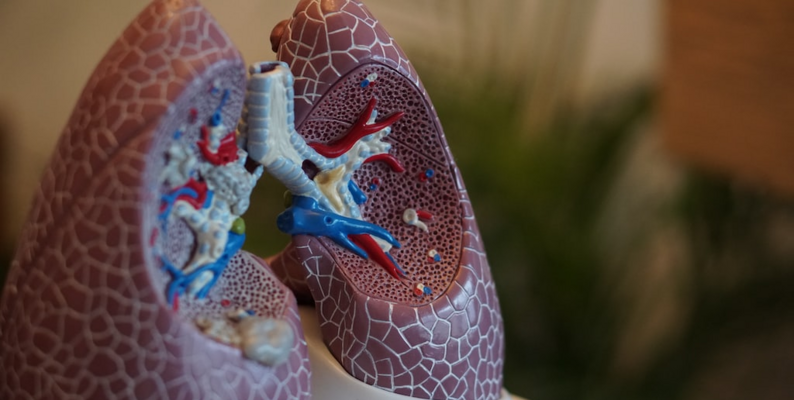   

Dataset was taken from [Kaggle](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data).   

This dataset contains information on patients with lung cancer, including:
- age,
- gender,
- air pollution exposure,
- alcohol use,
- dust allergy,
- occupational hazards,
- genetic risk,
- chronic lung disease,
- balanced diet,
- obesity,
- smoking,
- passive smoker,
- chest pain,
- coughing of blood,
- fatigue,
- weight loss,
- shortness of breath ,
- wheezing ,
- swallowing difficulty ,
- clubbing of finger nails and snoring. 

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.linear_model import LinearRegression

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("darkgrid")

## Load the Data

In [3]:
df = pd.read_csv('cancer_patient_data_sets.csv')
df.drop('index', axis=1, inplace=True)

In [4]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

# Preliminary Data Exploration


In [5]:
df.sample()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
439,P494,33,1,6,7,7,7,7,7,6,...,8,5,7,6,7,8,7,6,2,High


In [6]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

**No duplicated values in df**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

**All columns have 1000 non-null values**

In [8]:
df.rename(columns = {'chronic Lung Disease' : 'Chronic Lung Disease', 'OccuPational Hazards' :'Occupational Hazards'}, inplace = True)

In [9]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Occupational Hazards,Genetic Risk,Chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00",...,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,37.17,1.40,3.84,4.56,5.17,4.84,4.58,4.38,4.49,4.46,...,4.86,3.86,3.85,4.24,3.78,3.75,3.92,3.54,3.85,2.93
std,12.01,0.49,2.03,2.62,1.98,2.11,2.13,1.85,2.14,2.12,...,2.43,2.24,2.21,2.29,2.04,2.27,2.39,1.83,2.04,1.47
min,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,27.75,1.00,2.00,2.00,4.00,3.00,2.00,3.00,2.00,3.00,...,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
50%,36.00,1.00,3.00,5.00,6.00,5.00,5.00,4.00,4.00,4.00,...,4.00,3.00,3.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00
75%,45.00,2.00,6.00,7.00,7.00,7.00,7.00,6.00,7.00,7.00,...,7.00,5.00,6.00,6.00,5.00,5.00,5.00,5.00,6.00,4.00
max,73.00,2.00,8.00,8.00,8.00,8.00,7.00,7.00,7.00,7.00,...,9.00,9.00,8.00,9.00,8.00,8.00,9.00,7.00,7.00,7.00


**The dataset contains information on individuals ranging in age from 14 to 73 years, with a mean age of 37.17 years.**


In [10]:
x = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'Occupational Hazards', 'Genetic Risk',
       'Chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level']].phik_matrix(interval_cols='Age')

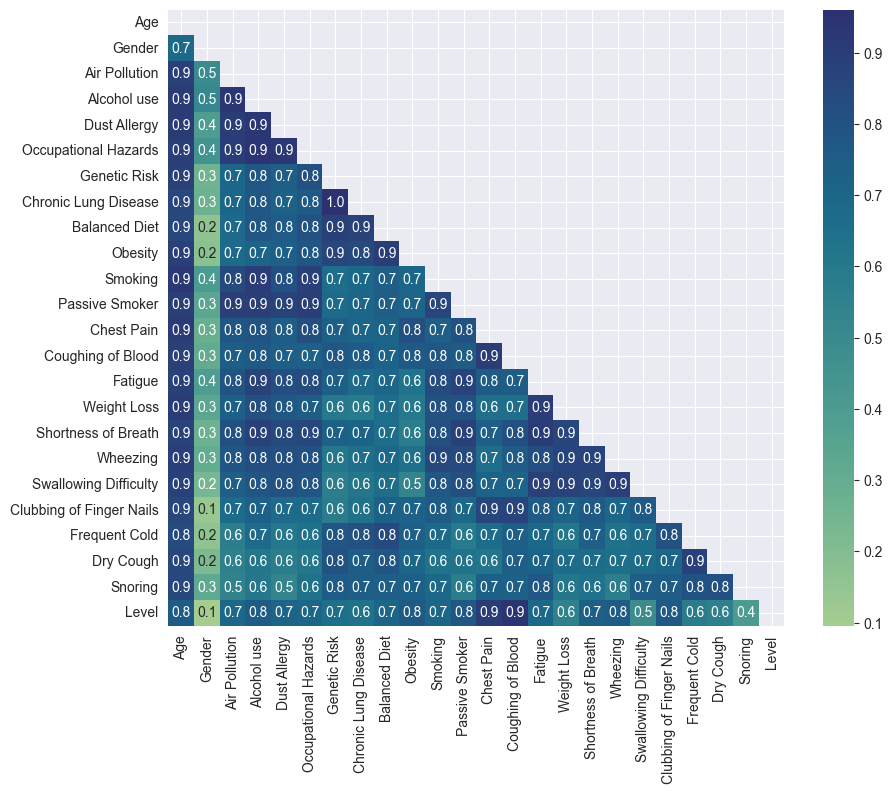

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(x, dtype=bool))

# Plot heatmap including the diagonal
plt.figure(figsize=(10,8))
sns.heatmap(x, mask=mask, cmap="crest", annot=True, fmt=".1f", square=True)
plt.show()

- **"Genetic Risk" shows a high positive correlation with factors like "Chronic Lung Disease" and "Smoking," which are well-documented contributors to lung health decline**
- **"Age" is strongly correlated with features like "Chronic Lung Disease" and "Fatigue," which are commonly associated with aging and its impact on respiratory health**.

**In contrast, features such as "Gender" or "Balanced Diet" tend to show weaker correlations with other risk factors**

# Visual Data Exploration


## Age distribution

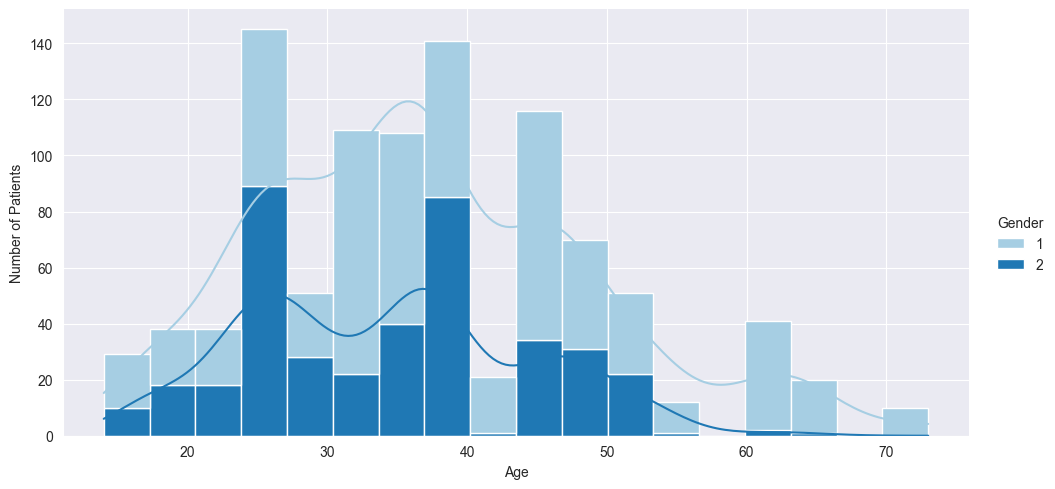

In [12]:
sns.displot(data=df, x=df.Age, aspect=2, kind='hist', kde=True, multiple="stack", hue='Gender', alpha=1, palette="Paired")
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

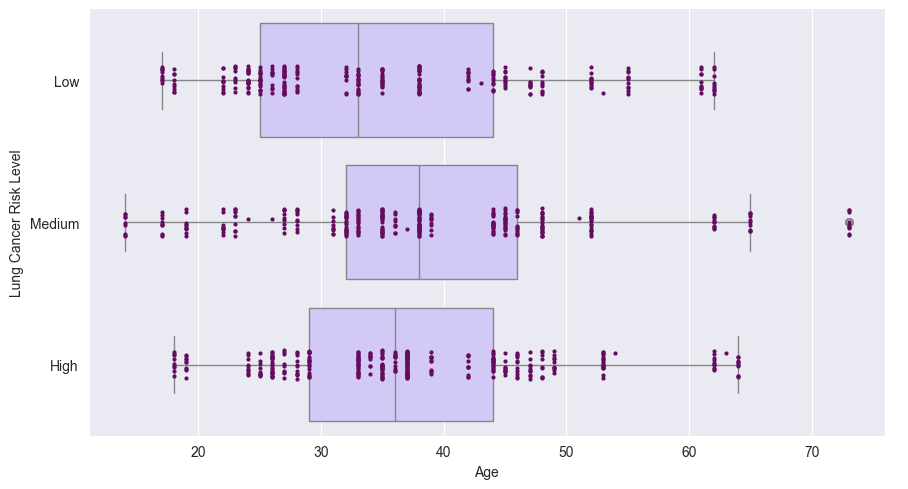

In [13]:
sns.catplot(data=df, x="Age", y="Level", color='#CDC1FF', aspect=1.8, kind='box', )
sns.stripplot(data=df, x="Age", y="Level", size=3, color="#640D5F")
plt.ylabel("Lung Cancer Risk Level")
plt.show()

## Genetic and Environmental Risk Factors

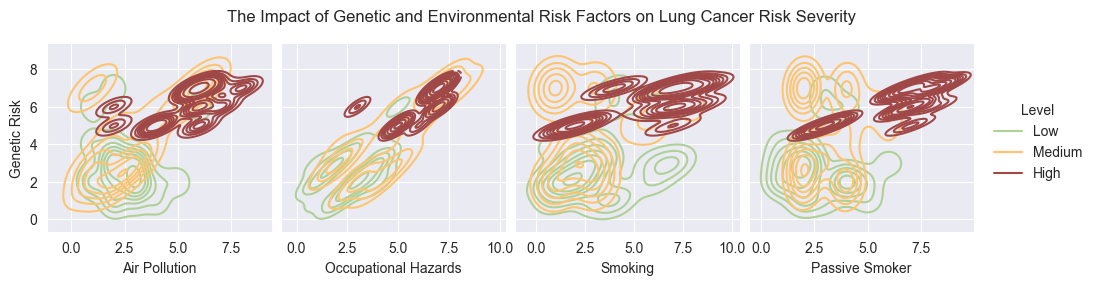

In [14]:
df_new = df[['Genetic Risk', 'Age', 'Air Pollution', 'Occupational Hazards', 'Smoking', 'Passive Smoker', 'Level']]

sns.pairplot(df_new,
             x_vars=['Air Pollution', 'Occupational Hazards', 'Smoking', 'Passive Smoker'],
             y_vars=['Genetic Risk'],
             hue="Level", kind='kde', palette={"High": "#A04747" , "Medium": "#FFC470", "Low": "#AFD198"})

plt.suptitle("The Impact of Genetic and Environmental Risk Factors on Lung Cancer Risk Severity", y=1.10, fontsize=12)
plt.show()

**The graph illustrates a strong correlation between high genetic risk and elevated exposure to negative environmental factors (such as pollution, smoking, and occupational hazards), which is associated with an increased risk of developing lung cancer. However, this relationship is less pronounced for medium and low levels of genetic and environmental factors.**

## Lifestyle and Chronic Diseases Factors

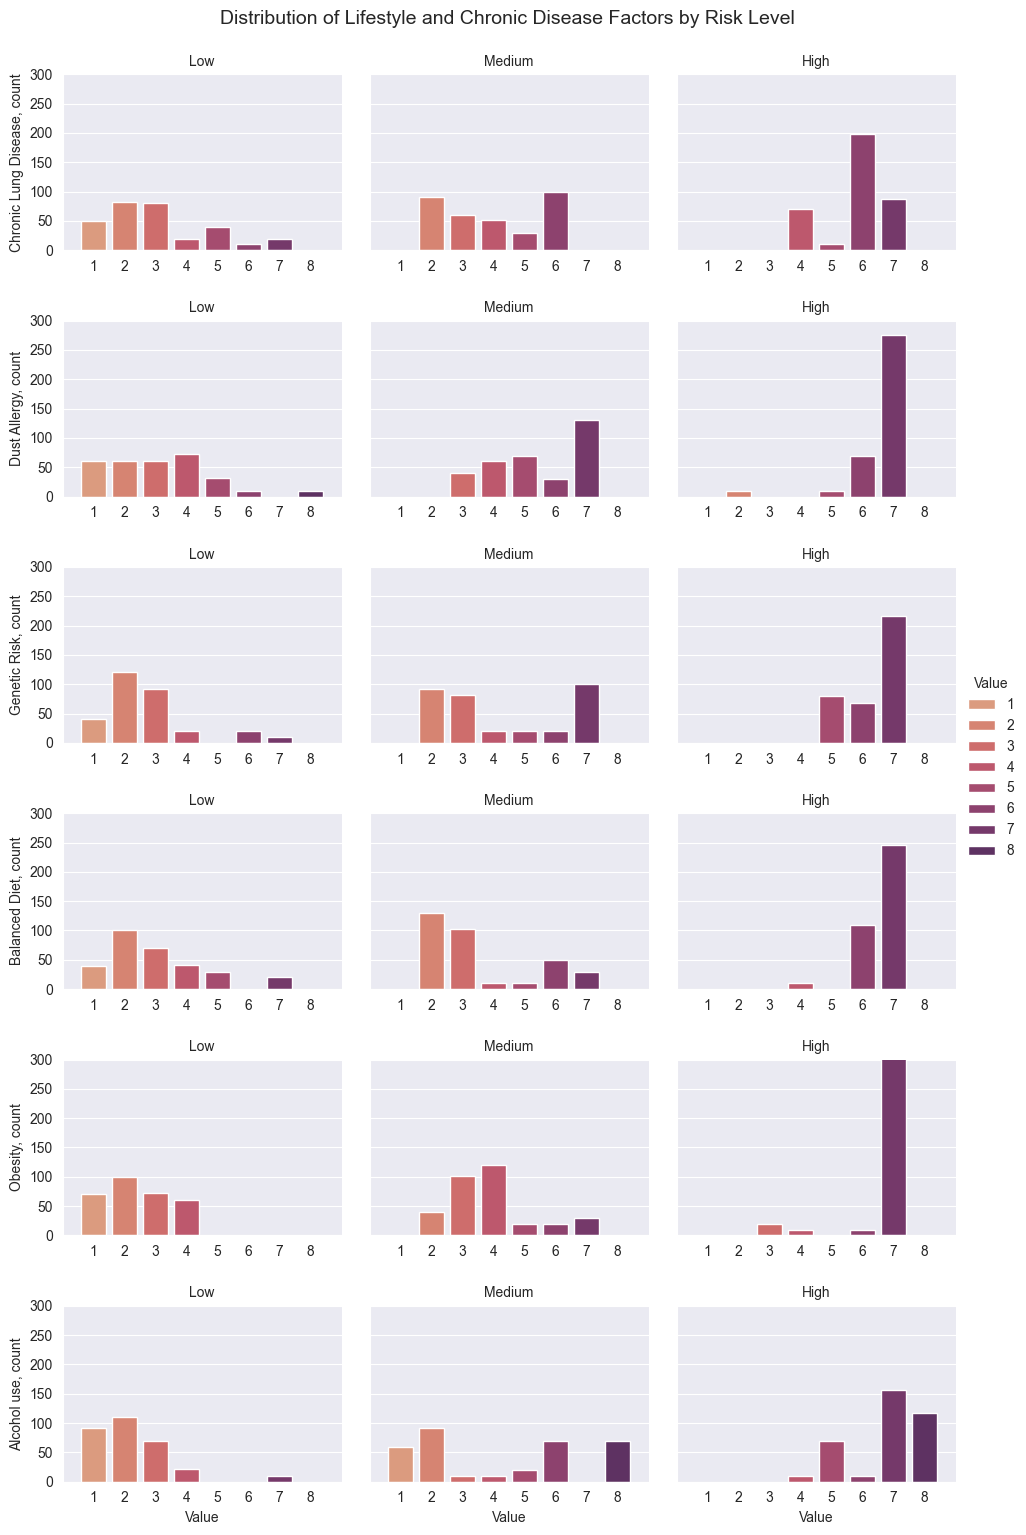

In [15]:
# Melt the data
melted_df = df.melt(id_vars=["Level"], value_vars=[
    "Chronic Lung Disease", "Dust Allergy", "Genetic Risk", 
    "Balanced Diet", "Obesity", "Alcohol use"
], var_name="Condition", value_name="Value")

# Convert 'Value' to a categorical variable with explicit categories (1 to 8)
melted_df['Value'] = pd.Categorical(melted_df['Value'], categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=True)

g = sns.catplot(
    data=melted_df, x="Value", hue="Value", col="Level", row="Condition", palette='flare',
    kind="count", height=2.5, aspect=1.3, sharex=False, sharey=True
)

row_labels = {
    "Chronic Lung Disease": "Chronic Lung Disease, count",
    "Dust Allergy": "Dust Allergy, count",
    "Genetic Risk": "Genetic Risk, count",
    "Balanced Diet": "Balanced Diet, count",
    "Obesity": "Obesity, count",
    "Alcohol use": "Alcohol use, count"
}

for ax in g.axes.flat:
    ax.set_xlim(-1, 8)  
    ax.set_ylim(0, 300)
    ax.set_xticks(range(0, 9))  

# Loop through the axes to set custom labels f
for i, condition in enumerate(row_labels.keys()):
    for j in range(len(g.col_names)):  
        g.axes[i, j].set_ylabel(row_labels[condition])  



g.set_titles(template="{col_name}")
g.fig.subplots_adjust(hspace=0.4, wspace=0.1)
g.fig.suptitle("Distribution of Lifestyle and Chronic Disease Factors by Risk Level", fontsize=14, y=1.02)
plt.show()

## Symptoms and Lung Canser Risk Level

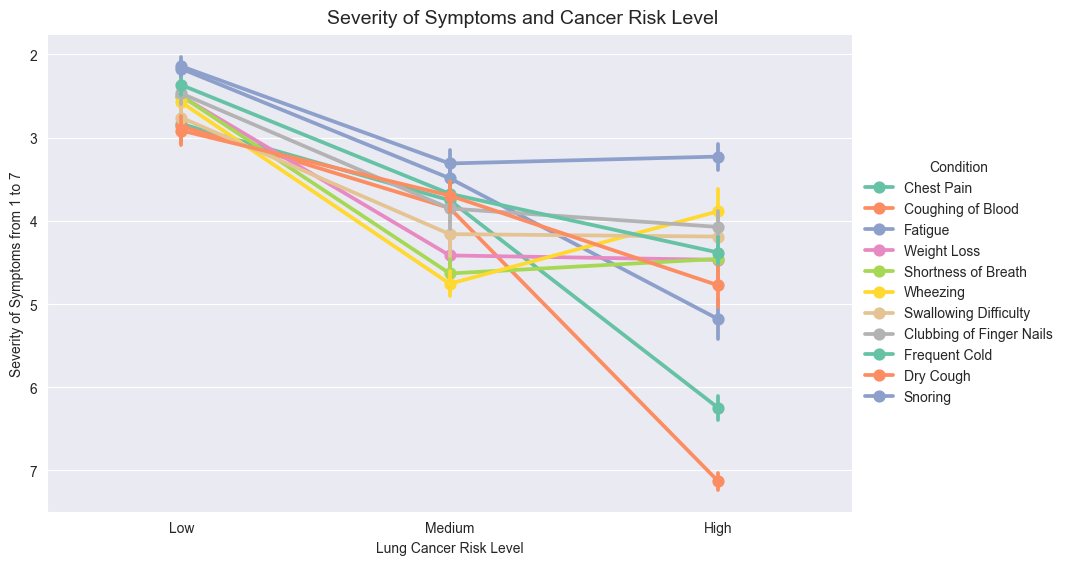

In [28]:
# Melt the data
melted_df = df.melt(id_vars=["Level"], value_vars=[
    'Chest Pain', 'Coughing of Blood', 'Fatigue',
    'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
    'Dry Cough', 'Snoring'
], var_name="Condition", value_name="Value")

# Convert 'Value' to a categorical variable with explicit categories (1 to 8)
melted_df['Value'] = pd.Categorical(melted_df['Value'], categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=True)

g = sns.catplot(
    data=melted_df, y="Value", hue="Condition", x="Level", palette='Set2',
    kind="point", height=5.5, aspect=1.6)

g.fig.suptitle("Severity of Symptoms and Cancer Risk Level", fontsize=14, y=1.02)
plt.xlabel("Lung Cancer Risk Level")
plt.ylabel("Severity of Symptoms from 1 to 7")
plt.show()

In [ ]:
melted_df

# Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df.replace({"Low": 1, "Medium": 2, "High": 3,}, inplace=True, regex=True)

In [ ]:
df.Level.value_counts()

In [ ]:
df.info()

In [ ]:
X_features = pd.DataFrame(df, columns=['Air Pollution', 'Occupational Hazards', 'Genetic Risk',
       'Chronic Lung Disease', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Dry Cough', 'Snoring'])

In [ ]:
y_target_cancer_level = pd.DataFrame(df, columns=['Level'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_cancer_level, test_size=0.30, train_size=0.70, random_state=10)

In [ ]:
# % of training set
train_pct = 100*len(X_train)/len(X_features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/X_features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)


# r-squared for the regression on the training data
rsquared = regression.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

**Linear regression model explains 93% of the variance in the training data, which is a very good fit**

In [ ]:
# Coefficients for our regression
regr_coef = pd.DataFrame(regression.coef_.reshape(len(X_train.columns), 1), index=X_train.columns,  columns=['Coefficient'])

regr_coef

In [ ]:
# Calculate metrics for training and test data
# Predict on test data
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)

# Calculate metrics for training and test data
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Training MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Test MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")

**The metrics for the test data are very close to the training data, which suggests that your model generalizes well and is not overfitting.
Both the MAE and RMSE are low, indicating good predictive performance. The R-squared of 0.92 on the training data shows that your model fits the data well.**

In [ ]:
# count predicted values
predicted_values = regression.predict(X_train)

# count residuals (difference between real prices and predicted)
residuals = y_train - predicted_values

In [ ]:
X_train.count()

In [ ]:
# Original Regression of Actual vs. Predicted Risk Level
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='grey')
plt.title('Actual vs Predicted Level', fontsize=17)
plt.xlabel('Actual risk level', fontsize=14)
plt.ylabel('Prediced risk level', fontsize=14)
plt.show()

**The points generally align with the diagonal line, but there is some noticeable spread, particularly at the lower actual risk levels (around 1.0 and 2.0).**

**Issues with Linear Regression for Categorical Targets:**
- Assumption Violation: Linear regression assumes that the relationship between input features and the target is linear and continuous, which doesn't hold for ordinal or categorical values. For example, the difference between "Low" and "Medium" risk may not be the same as the difference between "Medium" and "High" risk.
- Interpretation Issues: Linear regression would treat the risk levels as continuous, which might not make logical sense, especially if the differences between the categories are not uniform.

# Ordinal Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mord import LogisticIT  

# Let's try ordinal regression model


X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'Occupational Hazards', 'Genetic Risk',
       'Chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']]  
y = df['Level'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ordinal regression model (Logistic Ordinal Regression)
model = LogisticIT()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance (accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)